# SF1626 Lecture highlights: Chapter 16
by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

Lecture 1: 16.1, 16.2

Lecture 2: 16.3, 16.4

Lecture 3: 16.5

## Chap 16.1: gradient, divergence and curl

* You need to know the notations and definitions of two very fundamental operations: 
    the **divergence** and **curl** of a vector field 
    
    $$\mathbf{F}(x,y,z)=F_1(x,y,z)~\mathbf{i}+F_2(x,y,z)~\mathbf{j}+F_3(x,y,z)~\mathbf{k}$$
    
    $$\mathrm{div}~\mathbf{F}\equiv\nabla\cdot \mathbf{F} := \frac{\partial F_1}{\partial x}+\frac{\partial F_2}{\partial y}+\frac{\partial F_3}{\partial z}= 
    \left(\begin{array}{c}
\frac{\partial}{\partial x}\\
\frac{\partial}{\partial y}\\
\frac{\partial}{\partial z}
\end{array}\right)\cdot\left(\begin{array}{c}
F_{1}\\
F_{2}\\
F_{3}
\end{array}\right)$$
    
    $$\mathrm{curl}~\mathbf{F}\equiv\nabla\times \mathbf{F}:= \left(\begin{array}{ccc}
\mathbf{i} & \mathbf{j} & \mathbf{k}\\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z}\\
F_{1} & F_{2} & F_{3}
\end{array}\right) $$

**Caution**: $\nabla\cdot\mathbf{F}$. is scalar function, while $\mathbf{F}\cdot\nabla:=F_1\frac{\partial}{\partial x}+\frac{\partial}{\partial y}+\frac{\partial}{\partial z}$ is a differential operator

$$\mathbf{F}\cdot\nabla g(x,y,z) = F_1\frac{\partial g}{\partial x}+F_2\frac{\partial g}{\partial y}+F_3\frac{\partial g}{\partial z}$$

Do Examples 1, 2

### Interpretation of the divergence of a vector field

**Theorem 1** (p 916) **Divergence as flux density**

The divergence of the vector field is **the total flux out of an infimitesimal sphere, divided by the (infimitesimal) enclosed by the sphere**.

$$ \mathrm{div}~\mathbf{F}(P) = \lim_{\epsilon\rightarrow 0^+} \frac{3}{4\pi\epsilon^3} \iint_{B_\epsilon}\mathbf{F}\cdot\hat{\mathbf{N}}~dS $$

* $P\in\mathbb{R}^3$ is a point in the domain

* $B_\epsilon$ is the sphere of radius $\epsilon$, centered at the point $P$

* $ 4\pi\epsilon^3/3$ is the volume of the region enclosed by $B_\epsilon$

* The flux $\iint_{B_\epsilon}\mathbf{F}\cdot\hat{\mathbf{N}}~dS $

* $\hat{\mathbf{N}}$ is the *outward* normal of $B_\epsilon$

I think it is more intuitive if one looks at the above formula as: 

$$ \lim_{\epsilon\rightarrow 0^+} \frac{4\pi\epsilon^3}{3} \mathrm{div}~\mathbf{F}(P) = \lim_{\epsilon\rightarrow 0^+}  \iint_{B_\epsilon}\mathbf{F}\cdot\hat{\mathbf{N}}~dS $$

### Interpretation of the Curl

**Theorem 2** **The curl as *circulation* density**

$$\lim_{\epsilon\rightarrow 0^+} \frac{1}{\pi\epsilon^2} \oint_{C_\epsilon} \mathbf{F}\cdot d\mathbf{r} = \hat{\mathbf{N}}\cdot \mathrm{curl}\mathbf{F}(P)$$

#### Dirac distribution $\delta(x)$

Also called **Dirac delta function**. It is a type of **generalizaed functions** called **distribution**.

$$\int_a^b \delta(x)f(x) dx =\cases{f(0),~~~a<0<b\\
                                    0,~~~\mathrm{otherwise}} $$
                                    
* Imagine a density of a material spreading over the real line and described by $d_n(x)$.
* Image that as $n$ increases, the density of this material becomes more and more concentrated around 0.
* For every $n>0$, the total amount of this material remains the saem, which we asusme here is 1:

$$\int_{-\infty}^\infty d_n(x) dx \equiv 1,~~~n=0,1,2,3,\cdots$$

* If certain conditions of $d_n(x)$ are met, then the **Dirac delta function** is defined by how *in the limit* as $n\rightarrow\infty$, the following integrals become:

$$\int_{-\infty}^\infty \delta(x)f(x) dx := \lim_{n\rightarrow\infty} \int_{-\infty}^\infty d_n(x) f(x) dx=f(0)$$ 

for a class of reasonable functions $f$.

So, what would be the value of the following integral:

$$\int_{-\infty}^\infty \delta(x-1) f(x) dx =?$$

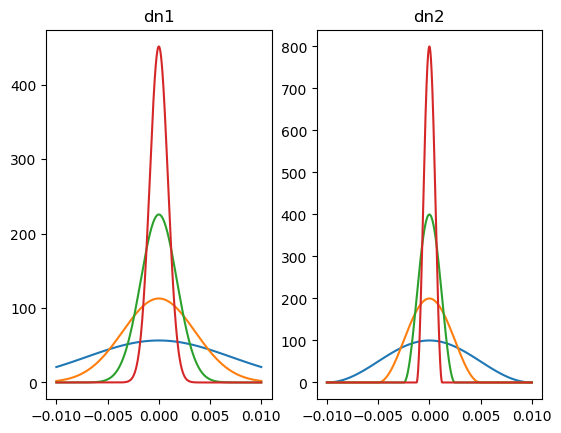

N=100,	 error using dn1=-0.1531112181,	 using dn2=-0.0000063610
N=200,	 error using dn1=-0.0045582829,	 using dn2=-0.0000015902
N=400,	 error using dn1=-0.0000015360,	 using dn2=-0.0000003976
N=800,	 error using dn1=-0.0000003802,	 using dn2=-0.0000000994


In [30]:
using PyPlot, Printf

f(x)=cos(x+0.231)

dn1(x, n) = n*exp(-(n*x)^2)/√(π)
dn2(x, n) = (abs(n*x)<1.0 ? cos(n*x*π/2)^2*n : 0.0)

for N in (100, 200, 400, 800)
    sum1=0.0
    sum2=0.0
    
    X=range(-0.01, stop=0.01, length=N+1)
    
    subplot(121)
    plot(X, dn1.(X,N))
    title("dn1")
    
    subplot(122)
    plot(X, dn2.(X,N))
    title("dn2")
    
    for x in range(-0.01, stop=0.01, length=200N+1)
        Δx=0.02/(200N)
        sum1+= dn1(x, N)*f(x)*Δx

        sum2+= dn2(x, N)*f(x)*Δx
    end
    
    Printf.@printf("N=%d,\t error using dn1=%1.10f,\t using dn2=%1.10f\n", N, sum1-f(0), sum2-f(0))
    
end

Example 4 (p 920)


## Chap 16.2

You need to know at least the following two identities in Theorem 3 (p923)

(g) The divergence of the curl F is zero

$$\nabla\cdot\left( \nabla\times\mathbf{F}\right) =0$$

    
(h) The curl of a conservative vector field is zero (the curl of the gradient of a function is zero)

$$\nabla\times \left( \nabla\phi\right) =0$$


**Definition 2** (p 925)

* A vector field $\mathbf{F}$ is called **solenoidal** (or divergence free) is a domain $D$ if $\mathrm{div}~\mathbf{F}=0$ in $D$.

* A vector field $\mathbf{F}$ is called **irrotational** is a domain $D$ if $\mathrm{curl}~\mathbf{F}=\mathbf{0}$ in $D$.

You need to know the following two theorems. You are not requried to know the proofs.

**Theorem 4** (p 925) If $\mathbf{F}$ is irrotational, then $\mathbf{F}$ is conservative.

(We need to clarify the hypotheses of the theorem)

**Theorem 5** (p 925) If $\mathbf{F}$ is solenoidal, then it is the curl of some other vector field $\mathbf{G}$.

($\mathbf{G}$ is called a **vector potential**)

In the previous Chapter, we introduced the concept of *conservative fields*. 

Not every vector field is conservative.  

But it turns out that "reasonable" vector fields can be written as the sum of a conservative vector field and a **divergence free** vector field.

#### Helmholtz-Hodge decomposition of a vector field

$\mathbf{F}$ is a sufficiently smooth and rapid decaying vector field in 3D.

$\mathbf{F}=\nabla\phi + \mathbf{r}$ such that $\nabla\cdot\mathbf{r}=0$ 

## Green's theorem

It is a two dimensional version of the Fundamental Theorem of Calculus.

Consider a region, $R$, on the xy-plane in 3D. 

$$ \iint_R \mathrm{curl}~\mathbf{F}\cdot \mathbf{k} dA = \oint_C \mathbf{F}\cdot d\mathbf{r}$$

Or equivalently

$$ \iint_R \left( \frac{\partial F_2}{\partial x}-\frac{\partial F_1}{\partial y}\right)dA = \oint_C F_1(x,y)dx+F_2(x,y)dy$$

* This theorem **relates** an area integral (on the left) to its corresponding **line** integral (on the right)



## The divergence theorem (aka Green's theorem)

$D$ is regular. The bound ary $\Sigma$ isoriented and closed

$\hat{\mathbf{N}}$ is the normal vector field on $D$, **pointing out** of $D$.

$$\iiint_D \nabla\cdot\mathbf{F} dV = \iint_\Sigma \mathbf{F}\cdot\hat{\mathbf{N}} dS $$

## Stoke's theorem

Condition on $\Sigma$

$$\oint_C \mathbf{F}\cdot d\mathbf{r} = \iint_\Sigma \nabla\times \mathbf{F}\cdot \hat{\mathbf{N}} dS $$